In [1]:
import numpy as np
import matplotlib.pyplot as plt
import histlite as hl
import csky as cy 
cy.plotting.mrichman_mpl()

/mnt/ceph1-npx/user/xk35/software/external/csky/csky/plotting.py:92: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  r'\SetSymbolFont{operators}   {sans}{OT1}{cmss} {m}{n}'


In [2]:
dt= 1e0
sig = {}
gamma = 2.0
t0 = 57570

trials_dir = ('/data/ana/analyses/NuSources/2023_galactic_center_analysis/')
sig_dir = (f'{trials_dir}/sig_trials/gamma/{gamma}/dt/{dt}/n_sig/')
sig[dt] = cy.bk.get_all(sig_dir, 'trial*npy', merge=np.concatenate, post_convert=cy.utils.Arrays, log=False) 

In [3]:
sorted_sig = sorted(sig[dt].items())

allt = []
for i in zip(sorted_sig):
    i[0][1]['ntrue'] = np.repeat(i[0][0], len(i[0][1].dt))
    allt.append(i[0][1])

allt = cy.utils.Arrays.concatenate(allt)

if dt <= 1:
        n_sigs = np.r_[2:59:8] 
elif dt in [1e1,1e2]:
        n_sigs = np.r_[20:201:15]
elif dt == 1e3:
        n_sigs = np.r_[100:501:50]


dns = np.mean(np.diff(n_sigs))
ns_bins = np.r_[n_sigs - 0.5*dns, n_sigs[-1] + 0.5*dns]
expect_kw = dict(color='C0', ls='--', lw=1, zorder=-10)
expect_gamma = gamma

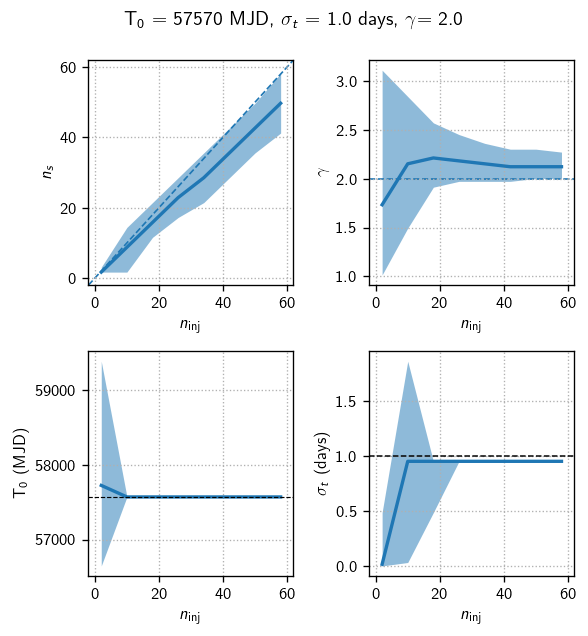

In [4]:
sig, axs = plt.subplots(2, 2, figsize=(5,5))
axs = axs.flatten()
t0=57570
dns = np.mean(np.diff(n_sigs))
ns_bins = np.r_[n_sigs - 0.5*dns, n_sigs[-1] + 0.5*dns]
expect_kw = dict(color='C0', ls='--', lw=1, zorder=-10)
expect_gamma = gamma

ax = axs[0]
h = hl.hist((allt.ntrue, allt.ns), bins=(ns_bins, 100))
hl.plot1d(ax, h.contain_project(1),errorbands=True, drawstyle='default')

lim = ns_bins[[0, -1]]
ax.set_xlim(ax.set_ylim(lim))
ax.plot(lim, lim, **expect_kw)


ax = axs[1]
h = hl.hist((allt.ntrue, allt.gamma), bins=(ns_bins, 100))
hl.plot1d(ax, h.contain_project(1),errorbands=True, drawstyle='default')
ax.axhline(expect_gamma, **expect_kw)
ax.set_xlim(axs[0].get_xlim())


ax = axs[2]

h = hl.hist((allt.ntrue, allt.t0), bins=(ns_bins, 10000), log=(False,True))
hl.plot1d(ax, h.contain_project(1),errorbands=True, drawstyle='default')
ax.axhline(t0, color = 'black', ls = '--', lw=.7)
ax.set_xlim(axs[0].get_xlim())

ax = axs[3]

h = hl.hist((allt.ntrue, allt.dt), bins=(ns_bins, 50), log=(False,True))
hl.plot1d(ax, h.contain_project(1),errorbands=True, drawstyle='default')
ax.axhline(dt, color = 'black', ls = '--', lw=.9)
ax.set_xlim(axs[0].get_xlim())

for ax in axs:
    ax.set_xlabel(r'$n_\text{inj}$')
    ax.grid()
axs[0].set_ylabel(r'$n_s$')
axs[1].set_ylabel(r'$\gamma$')
axs[2].set_ylabel(r'T$_{0}$ (MJD)')
axs[3].set_ylabel(r'$\sigma_{t}$ (days)')
plt.tight_layout()
my_suptitle = plt.suptitle(rf'T$_{0}$ = 57570 MJD, $\sigma_t$ = {dt} days, $\gamma$'+f'= {gamma}', y=1.05)

plt.savefig(f'Plots/bias_gamma{gamma}_dt{dt}.png', bbox_inches='tight',bbox_extra_artists=[my_suptitle])
